# Exploratory Data Analysis of 911 Emergency Calls

This project analyzes a dataset of 911 emergency calls to identify trends in call types, timing, and geographical distribution. The goal is to uncover insights that can help understand emergency response demands over time.

Acknowledgements: Data provided by montcoalert.org

In [14]:
import numpy as np
import pandas as pd

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [16]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(6,4)

In [17]:
import kagglehub
import os

path = kagglehub.dataset_download("mchirico/montcoalert")

print("Path to dataset files:", path)

Path to dataset files: /Users/aradhanasingh/.cache/kagglehub/datasets/mchirico/montcoalert/versions/32


In [18]:
dataset_path = os.path.join(path, '911.csv')
data = pd.read_csv(dataset_path)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [19]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


##### Creating a reason column from title.

In [21]:
data['reason']=data['title'].apply(lambda x: x.split(':')[0])

In [22]:
data['reason'].head(15)

0         EMS
1         EMS
2        Fire
3         EMS
4         EMS
5         EMS
6         EMS
7         EMS
8         EMS
9     Traffic
10    Traffic
11    Traffic
12    Traffic
13    Traffic
14    Traffic
Name: reason, dtype: object

In [23]:
data['reason'].value_counts()

reason
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

##### So, EMS is the most common reason for 911 calls.


<Axes: xlabel='reason', ylabel='count'>

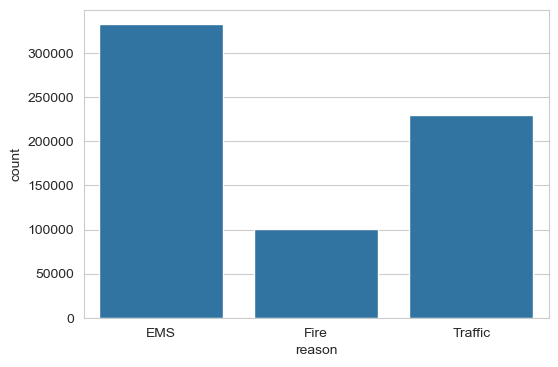

In [26]:
sns.countplot(x=data['reason'])

In [27]:
type(data['timeStamp'][0])

str

##### Converting the data type of timeStamp from str to datetime object for ease

In [29]:
data['timeStamp']=pd.to_datetime(data['timeStamp'])

In [30]:
data['timeStamp'].head()

0   2015-12-10 17:10:52
1   2015-12-10 17:29:21
2   2015-12-10 14:39:21
3   2015-12-10 16:47:36
4   2015-12-10 16:56:52
Name: timeStamp, dtype: datetime64[ns]

In [31]:
time=data['timeStamp'].iloc[0]
print('hour', time.hour)
print('month', time.month)
print('week', time.dayofweek)

hour 17
month 12
week 3


In [32]:
data['hour']=data['timeStamp'].apply(lambda x: x.hour)
data['month']=data['timeStamp'].apply(lambda x: x.month)
data['week']=data['timeStamp'].apply(lambda x: x.week)
data['day of week']=data['timeStamp'].dt.dayofweek
data.head(3)


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,week,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,50,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,50,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,50,3


##### Converting the data type of day of the month from int to str (mon to sun) for ease.
##### using calendar module

In [34]:
import calendar
data['day of week']=data['day of week'].apply(lambda x: calendar.day_name[x])

In [35]:
data.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,week,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,50,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,50,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,50,Thursday


##### Plotting the most common reason of 911 calls on each day of the week

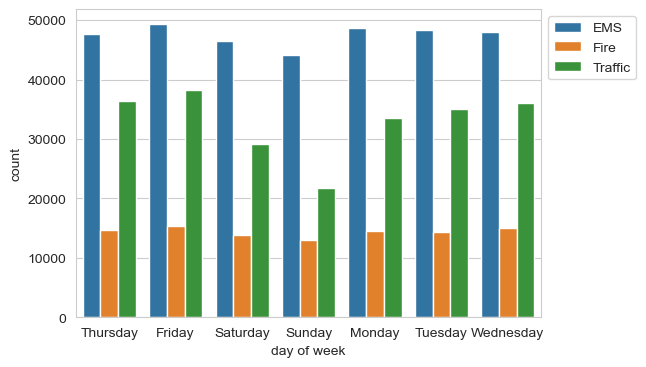

In [37]:
sns.countplot(x=data['day of week'], hue=data['reason'])
plt.legend(bbox_to_anchor=(1,1))

##### Traffic-related 911 calls are lowest on weekends, and calls for EMS are also low during this time.

##### Plotting the most common reason of 911 calls on each day of the week

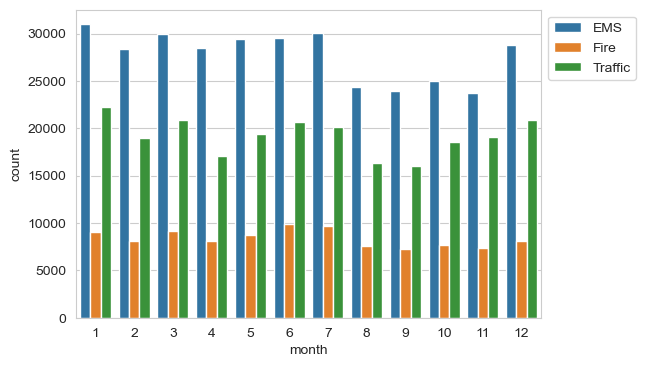

In [40]:
sns.countplot(x=data['month'], hue=data['reason'])
plt.legend(bbox_to_anchor=(1,1))

##### The count of 911 calls remains relatively consistent throughout the year. There are no sharp peaks or dips, showing a steady trend.

Text(0, 0.5, 'num of calls')

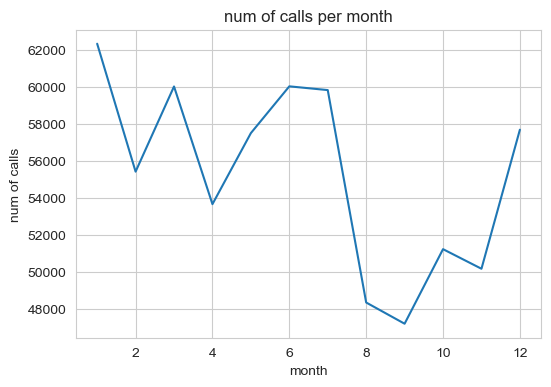

In [42]:
byMonth=data.groupby(by='month').count()
byMonth['e'].plot.line(y='e')
plt.title('num of calls per month')
plt.ylabel('num of calls')

##### Creating a plot to check for any correlation between the number of calls and months.

Text(7.625000000000002, 0.5, 'num of calls')

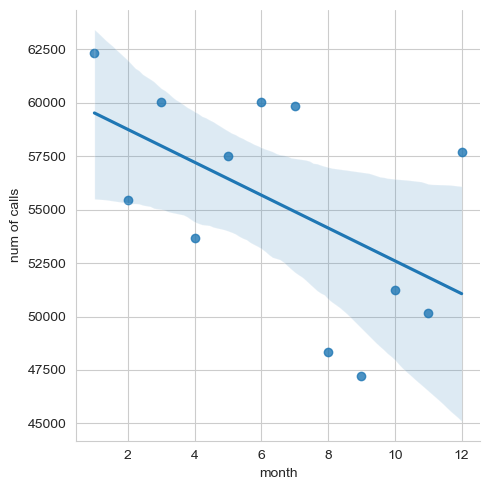

In [44]:
byMonth.reset_index(inplace=True)
sns.lmplot(x='month', y='e', data=byMonth)
plt.ylabel('num of calls')

##### There is an overall decreasing trend in the number of 911 calls as the year progresses. This could imply seasonal factors cause more calls earlier in the year like January compared to later months.

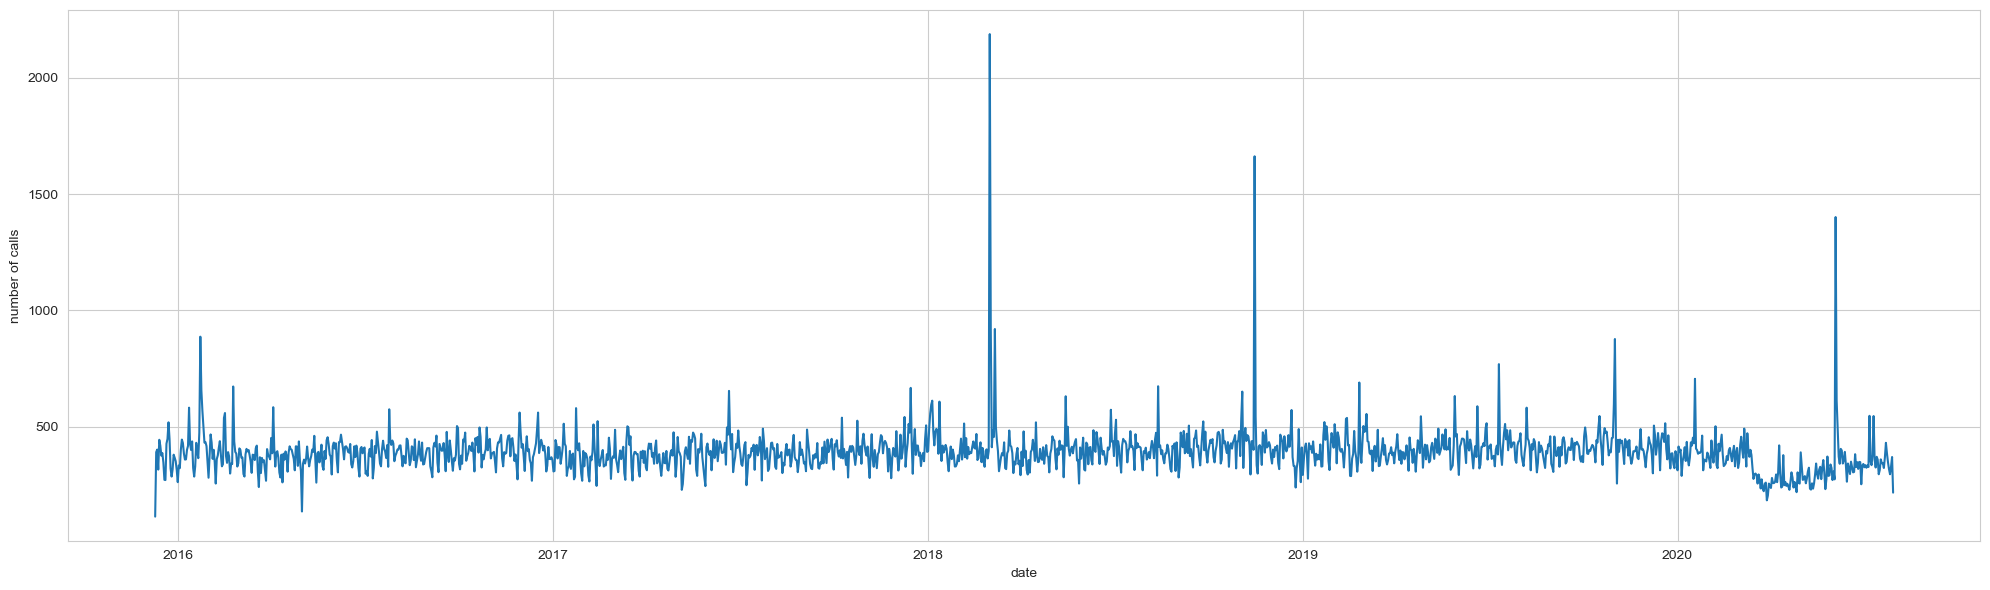

In [46]:
data['date'] = data['timeStamp'].dt.date  
plt.figure(figsize=(20, 6)) 
data.groupby('date').count()['e'].plot.line() 
plt.xlabel('date')  # X-axis label
plt.ylabel('number of calls') 
plt.tight_layout() 


##### Similarly plotting the reasons vs num of calls

Text(0, 0.5, 'num of calls')

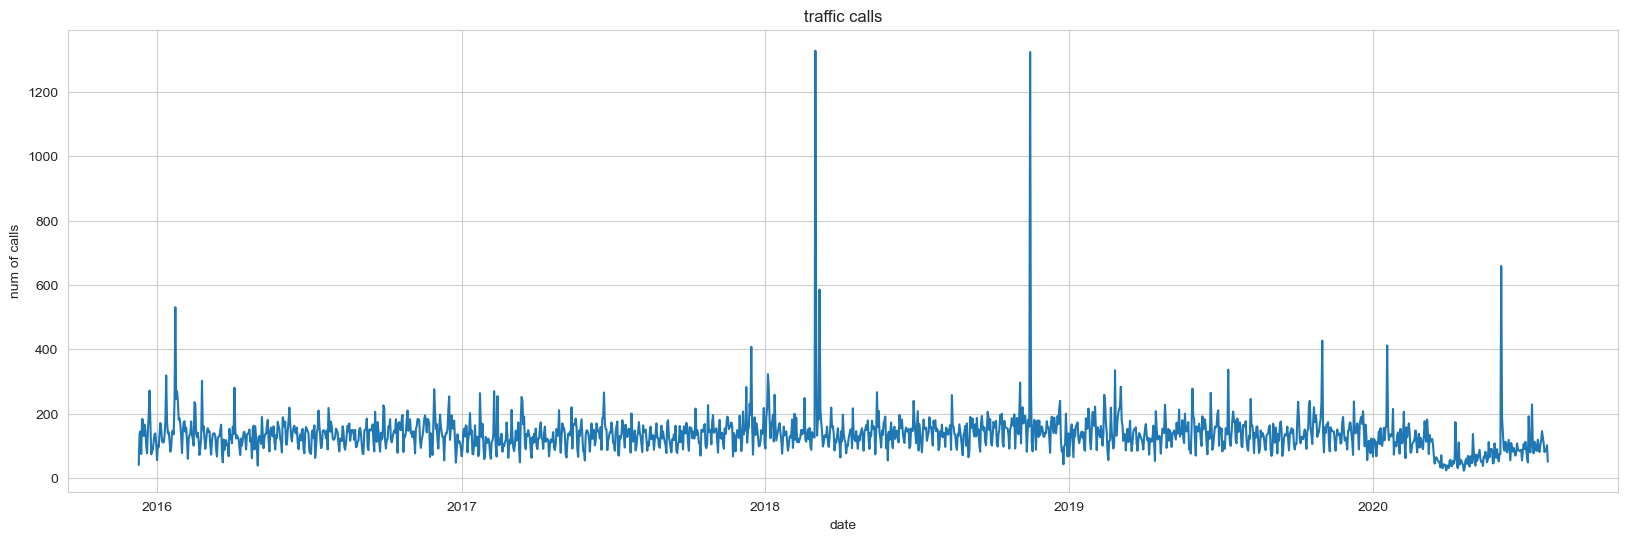

In [48]:
plt.figure(figsize=(20, 6))  
data[data['reason'] == 'Traffic'].groupby('date').count()['e'].plot.line()

plt.title('traffic calls')
plt.xlabel('date')
plt.ylabel('num of calls')





Text(0, 0.5, 'num of calls')

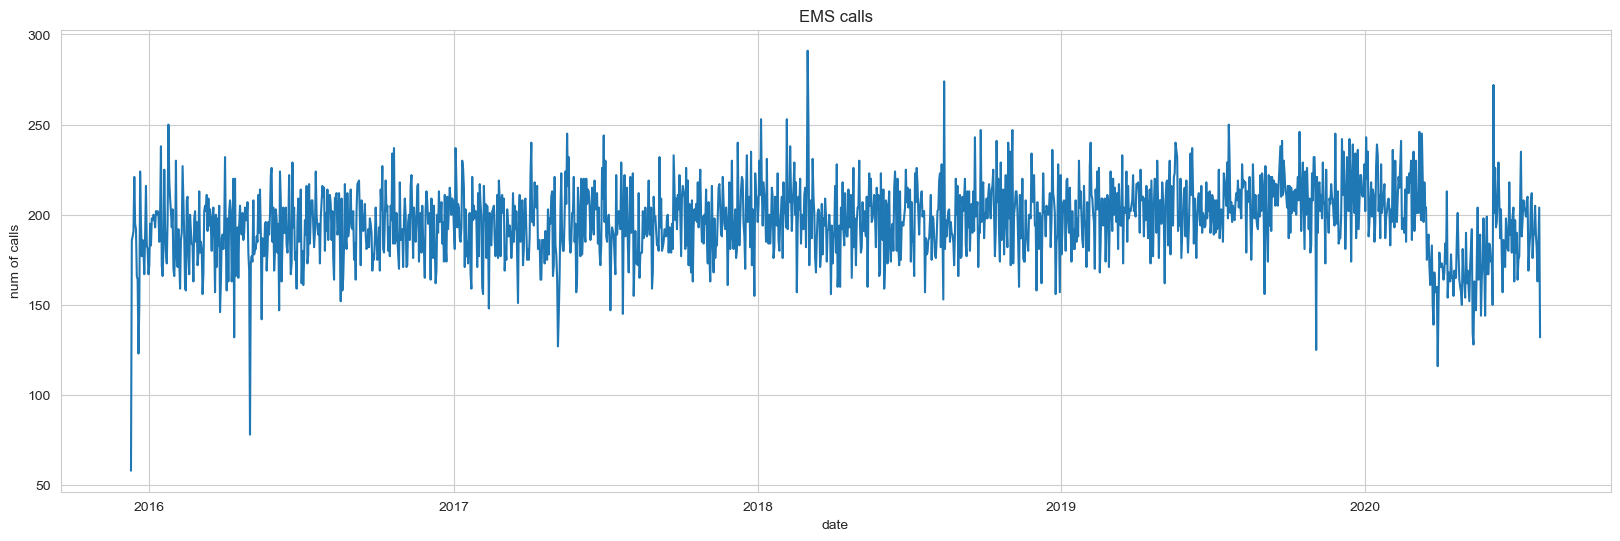

In [49]:
plt.figure(figsize=(20, 6))  
data[data['reason'] == 'EMS'].groupby('date').count()['e'].plot.line()

plt.title('EMS calls')
plt.xlabel('date')
plt.ylabel('num of calls')


Text(0, 0.5, 'num of calls')

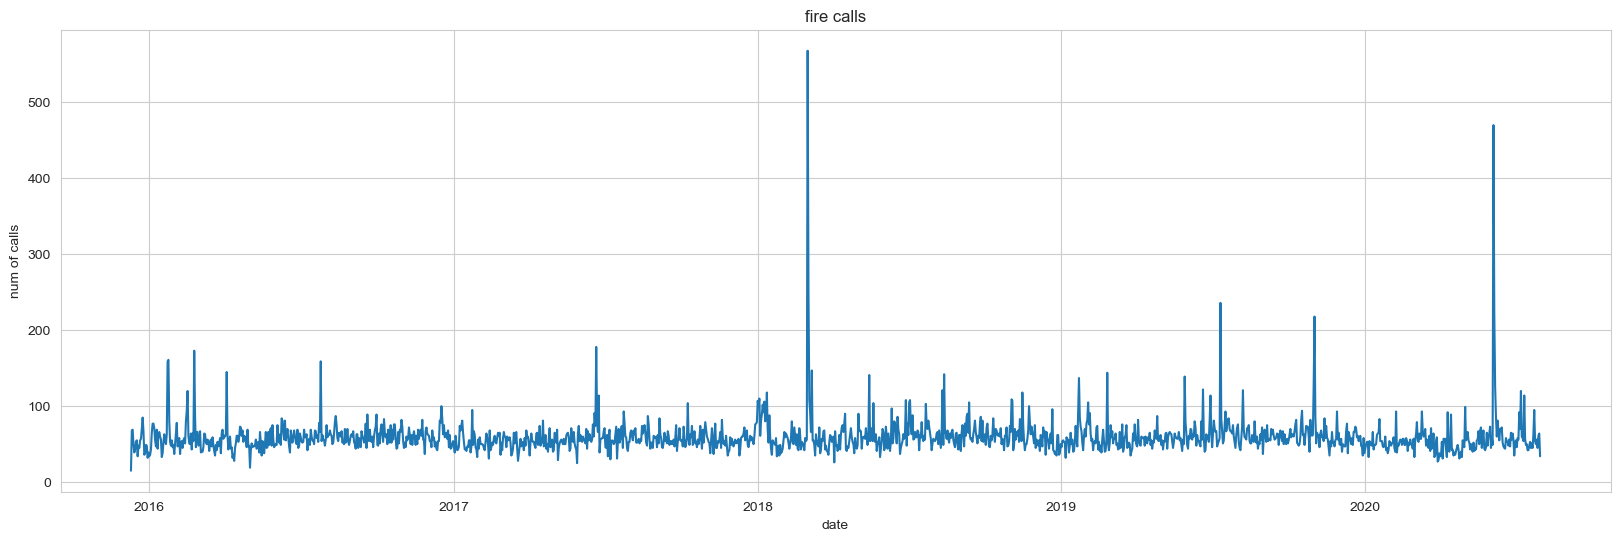

In [50]:
plt.figure(figsize=(20, 6))  
data[data['reason'] == 'Fire'].groupby('date').count()['e'].plot.line()

plt.title('fire calls')
plt.xlabel('date')
plt.ylabel('num of calls')


##### Creating a heatmap for the count of calls per hour

In [52]:
day_hour = data.pivot_table(values='lat',index='day of week',columns='hour',aggfunc='count')

day_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Friday,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Monday,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Saturday,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sunday,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323
Thursday,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Tuesday,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wednesday,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207


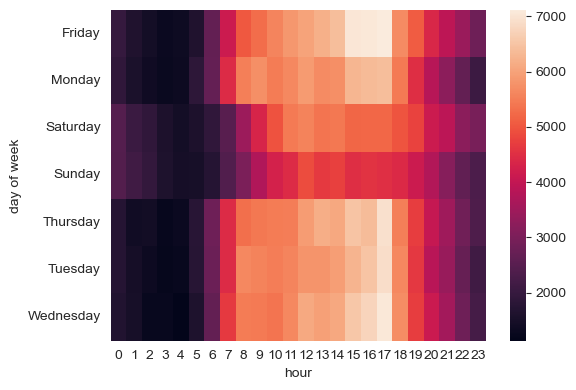

In [53]:
sns.heatmap(day_hour)

plt.tight_layout()

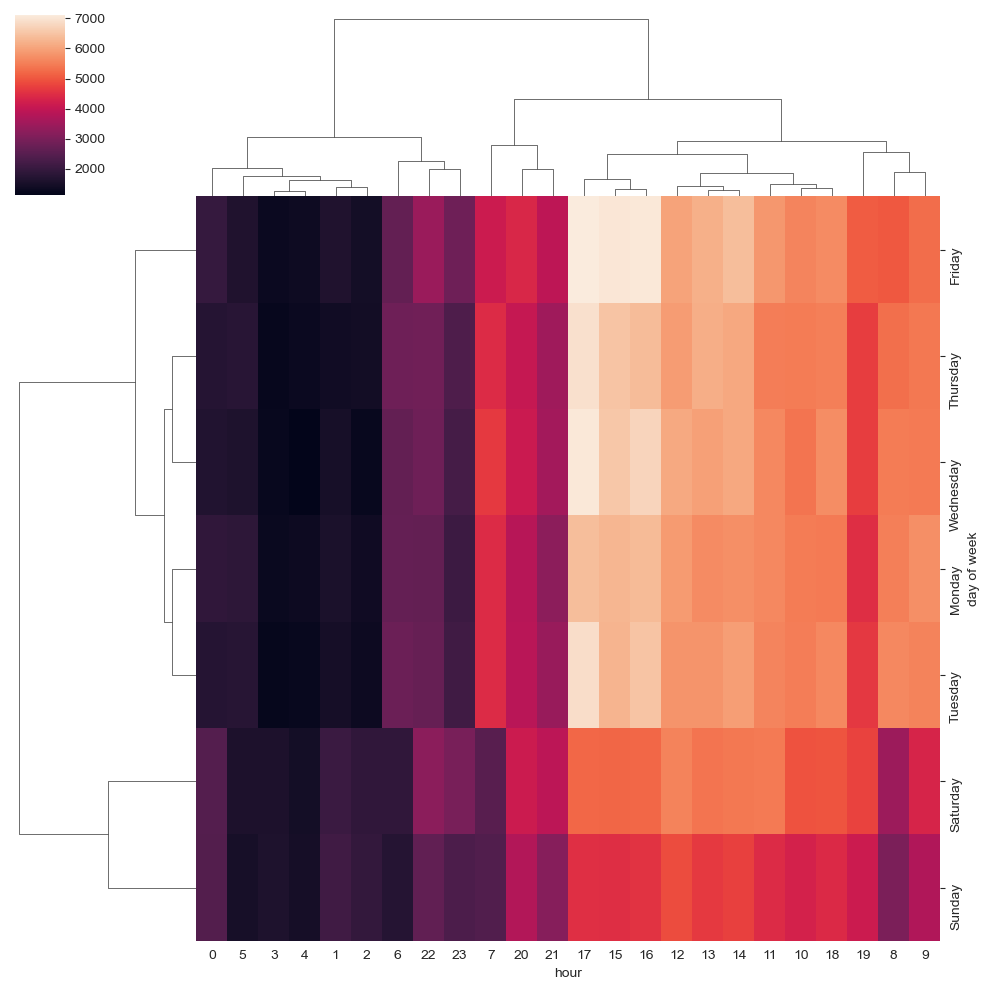

In [54]:
sns.clustermap(day_hour)